In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GroupKFold
import matplotlib.pyplot as plt

In [2]:
ROOT_FOLDER = "../../../../../hdd/storage/siim_covid_detection/resized_images_from_kaggle/"

In [3]:
df = pd.read_csv(ROOT_FOLDER + 'csv_tabular/train_study_image.csv')
print("df.shape = ", df.shape)
df.head()

df.shape =  (6334, 8)


,image_id,boxes,label,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75_study,0,1,0,0
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed_study,1,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7_study,0,1,0,0
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2_study,0,0,0,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e_study,0,1,0,0


In [4]:
# df = df[~((df['label']=="none 1 0 0 1 1")&(df['Negative for Pneumonia']==0))]
# df.reset_index(inplace=True, drop=True)
# df

In [5]:
df = df[
    [
        'image_id',
        'study_id',
        'Negative for Pneumonia',
        'Typical Appearance',
        'Indeterminate Appearance',
        'Atypical Appearance'
    ]
]
print("df.shape = ", df.shape)
df.head()

df.shape =  (6334, 6)


,image_id,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2_image,5776db0cec75_study,0,1,0,0
1,000c3a3f293f_image,ff0879eb20ed_study,1,0,0,0
2,0012ff7358bc_image,9d514ce429a7_study,0,1,0,0
3,001398f4ff4f_image,28dddc8559b2_study,0,0,0,1
4,001bd15d1891_image,dfd9fdd85a3e_study,0,1,0,0


In [6]:
len(df[df['Atypical Appearance']==1]) * 100 /len(df)

7.625513103883802

In [7]:
len(df[df['Indeterminate Appearance']==1]) * 100 /len(df)

17.49289548468582

In [8]:
len(df[df['Typical Appearance']==1]) * 100 /len(df)

47.473950110514686

In [9]:
len(df[df['Negative for Pneumonia']==1]) * 100 /len(df)

27.407641300915692

In [10]:
df.rename(columns={'Negative for Pneumonia':'0','Typical Appearance':'1',"Indeterminate Appearance":'2',
                   "Atypical Appearance":"3"}, inplace=True)
df.head()

,image_id,study_id,0,1,2,3
0,000a312787f2_image,5776db0cec75_study,0,1,0,0
1,000c3a3f293f_image,ff0879eb20ed_study,1,0,0,0
2,0012ff7358bc_image,9d514ce429a7_study,0,1,0,0
3,001398f4ff4f_image,28dddc8559b2_study,0,0,0,1
4,001bd15d1891_image,dfd9fdd85a3e_study,0,1,0,0


In [11]:
labels = []
def get_label(row):
    for c in df.columns:
        if row[c]==1:
            labels.append(int(c))
df.apply(get_label, axis=1)
print("label modified")

label modified


In [12]:
labels = {'class':labels}
study_label = pd.DataFrame(labels)
train_study = pd.concat([df, study_label], axis = 1)

In [13]:
del train_study ['0'];del train_study ['1'];del train_study ['2'];del train_study ['3']
train_study

,image_id,study_id,class
0,000a312787f2_image,5776db0cec75_study,1
1,000c3a3f293f_image,ff0879eb20ed_study,0
2,0012ff7358bc_image,9d514ce429a7_study,1
3,001398f4ff4f_image,28dddc8559b2_study,3
4,001bd15d1891_image,dfd9fdd85a3e_study,1
...,...,...,...
6329,ffcc6edd9445_image,7e6c68462e06_study,0
6330,ffd91a2c4ca0_image,8332bdaddb6e_study,0
6331,ffd9b6cf2961_image,7eed9af03814_study,1
6332,ffdc682f7680_image,a0cb0b96fb3d_study,1


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

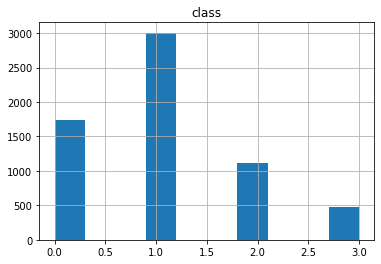

In [14]:
train_study.hist()

In [15]:
# np.random.seed(251096)
gkf = GroupKFold(n_splits=5)
train_study['fold'] = -1
for i, (train_index, test_index) in enumerate(gkf.split(train_study, groups=train_study.study_id.tolist())):
    train_study.loc[test_index, 'fold'] = i
#     print(test_index)

In [16]:
train_study

,image_id,study_id,class,fold
0,000a312787f2_image,5776db0cec75_study,1,4
1,000c3a3f293f_image,ff0879eb20ed_study,0,0
2,0012ff7358bc_image,9d514ce429a7_study,1,4
3,001398f4ff4f_image,28dddc8559b2_study,3,1
4,001bd15d1891_image,dfd9fdd85a3e_study,1,3
...,...,...,...,...
6329,ffcc6edd9445_image,7e6c68462e06_study,0,3
6330,ffd91a2c4ca0_image,8332bdaddb6e_study,0,3
6331,ffd9b6cf2961_image,7eed9af03814_study,1,2
6332,ffdc682f7680_image,a0cb0b96fb3d_study,1,1


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

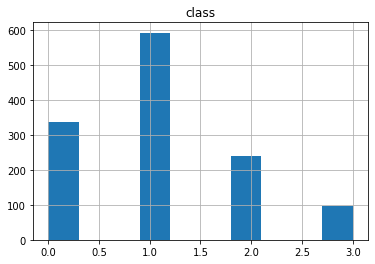

In [17]:
train_study[train_study.fold == 0][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

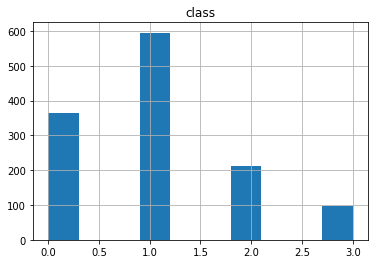

In [18]:
train_study[train_study.fold == 1][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

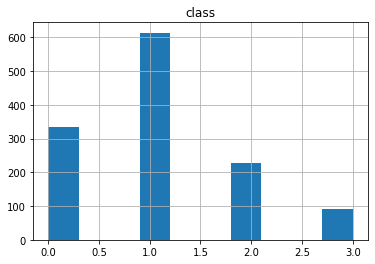

In [19]:
train_study[train_study.fold == 2][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

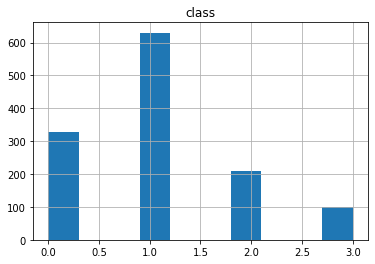

In [20]:
train_study[train_study.fold == 3][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

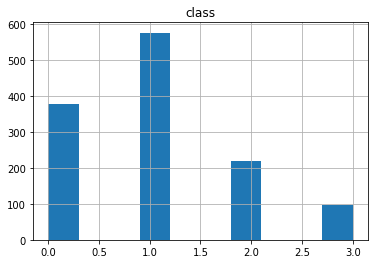

In [21]:
train_study[train_study.fold == 4][['class']].hist()

In [22]:
train_study.to_csv('crossval_info/original_gkf/train_study_cls_problem.csv', index = False)

In [23]:
df = pd.read_csv(ROOT_FOLDER + 'csv_tabular/train_study_image.csv')
print("df.shape = ", df.shape)
df.head()

df.shape =  (6334, 8)


,image_id,boxes,label,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75_study,0,1,0,0
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed_study,1,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7_study,0,1,0,0
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2_study,0,0,0,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e_study,0,1,0,0


In [24]:
df = df.merge(train_study[['image_id', 'class', 'fold']], on='image_id')
print("df.shape = ", df.shape)
df.head()

df.shape =  (6334, 10)


,image_id,boxes,label,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class,fold
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75_study,0,1,0,0,1,4
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed_study,1,0,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7_study,0,1,0,0,1,4
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2_study,0,0,0,1,3,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e_study,0,1,0,0,1,3


In [25]:
df[((df['label']=="none 1 0 0 1 1")&(df['Negative for Pneumonia']==0))]

,image_id,boxes,label,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class,fold
22,00c1515729a8_image,NaN,none 1 0 0 1 1,1a58b43cf286_study,0,1,0,0,1,1
31,0102b5cac730_image,NaN,none 1 0 0 1 1,81f6b4b343f7_study,0,1,0,0,1,3
32,b3ffe59e37c7_image,NaN,none 1 0 0 1 1,81f6b4b343f7_study,0,1,0,0,1,3
76,025bf835bba6_image,NaN,none 1 0 0 1 1,f4ead5d70ba6_study,0,0,0,1,3,0
129,04a0b90d7875_image,NaN,none 1 0 0 1 1,effcdb73627e_study,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
6194,fa38e3491eec_image,NaN,none 1 0 0 1 1,8087e3bc0efe_study,0,0,0,1,3,3
6213,fb38bfebfabd_image,NaN,none 1 0 0 1 1,37f638aff743_study,0,0,0,1,3,3
6282,fe1ce39cfa13_image,NaN,none 1 0 0 1 1,71e052c9da68_study,0,0,0,1,3,1
6312,fef5d9dd40e4_image,NaN,none 1 0 0 1 1,4b4d19205cf6_study,0,0,0,1,3,3


In [26]:
df.to_csv('crossval_info/original_gkf/df_image_study_class_fold.csv', index=False)

In [27]:
multilabel_df = df[
    [
        'image_id',
        'study_id',
        'Negative for Pneumonia',
        'Typical Appearance',
        'Indeterminate Appearance',
        'Atypical Appearance',
        'fold'
    ]]
multilabel_df

,image_id,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,fold
0,000a312787f2_image,5776db0cec75_study,0,1,0,0,4
1,000c3a3f293f_image,ff0879eb20ed_study,1,0,0,0,0
2,0012ff7358bc_image,9d514ce429a7_study,0,1,0,0,4
3,001398f4ff4f_image,28dddc8559b2_study,0,0,0,1,1
4,001bd15d1891_image,dfd9fdd85a3e_study,0,1,0,0,3
...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,7e6c68462e06_study,1,0,0,0,3
6330,ffd91a2c4ca0_image,8332bdaddb6e_study,1,0,0,0,3
6331,ffd9b6cf2961_image,7eed9af03814_study,0,1,0,0,2
6332,ffdc682f7680_image,a0cb0b96fb3d_study,0,1,0,0,1


In [28]:
multilabel_df.to_csv('crossval_info/original_gkf/multi_label_problem.csv', index=False)